In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
## starting with the inputs

In [169]:
## enter the values in order(all in SI units): length, EI, nodes, elements, force

In [170]:
inputs_list = dict() 
for i in range(6):
    data = input('Enter key & value separated by ":", ') 
    temp = data.split(':') 
    inputs_list[temp[0]] = temp[1] 
print()
# Displaying the dictionary 
for key, value in inputs_list.items(): 
    inputs_list[key] = float(value)
    print(f'Key: {key}, Value: {value}') 
print(inputs_list)

Enter key & value separated by ":", length:2
Enter key & value separated by ":", EI:800000
Enter key & value separated by ":", elements:4
Enter key & value separated by ":", nodes:5
Enter key & value separated by ":", force:-12000
Enter key & value separated by ":", element_length:0.5

Key: length, Value: 2
Key: EI, Value: 800000
Key: elements, Value: 4
Key: nodes, Value: 5
Key: force, Value: -12000
Key: element_length, Value: 0.5
{'length': 2.0, 'EI': 800000.0, 'elements': 4.0, 'nodes': 5.0, 'force': -12000.0, 'element_length': 0.5}


In [171]:
t=np.array([[12,6*inputs_list['element_length'],-12,6*inputs_list['element_length']],[6*inputs_list['element_length'],4*(inputs_list['element_length'])*(inputs_list['element_length']),-6*inputs_list['element_length'],2*(inputs_list['element_length'])*(inputs_list['element_length'])],[-12,-6*inputs_list['element_length'],12,-6*inputs_list['element_length']],[6*inputs_list['element_length'],2*(inputs_list['element_length'])*(inputs_list['element_length']),-6*inputs_list['element_length'],4*(inputs_list['element_length'])*(inputs_list['element_length'])]])

In [172]:
t

array([[ 12. ,   3. , -12. ,   3. ],
       [  3. ,   1. ,  -3. ,   0.5],
       [-12. ,  -3. ,  12. ,  -3. ],
       [  3. ,   0.5,  -3. ,   1. ]])

In [173]:
import numpy
elementalLength = inputs_list['length'] / (int(inputs_list['elements']))
nodesPosi = [i * elementalLength  for i in range(int(inputs_list['elements'])+1)]
nodesPosi= numpy.transpose(nodesPosi).reshape(-1,1)

In [174]:
nodesPosi

array([[0. ],
       [0.5],
       [1. ],
       [1.5],
       [2. ]])

In [175]:
inputs_list['nodes'] = int(inputs_list['nodes'])

In [176]:
## global stiffness matrix, force arrangement
kg=np.zeros((inputs_list['nodes']*2, inputs_list['nodes']*2))
u = np.zeros((inputs_list['nodes']*2,1))
F = np.zeros((inputs_list['nodes']*2,1))
FE= F[:int(inputs_list['elements']),:int(inputs_list['elements'])]

In [177]:
kg

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [178]:
f =np.array([[inputs_list['force']*elementalLength/2],[inputs_list['force']*elementalLength*elementalLength/12],[inputs_list['force']*elementalLength/2],[inputs_list['force']*elementalLength*elementalLength/12]])

In [179]:
f

array([[-3000.],
       [ -250.],
       [-3000.],
       [ -250.]])

In [180]:
EI = inputs_list['EI']
K = ( inputs_list['EI'] /(elementalLength*elementalLength*elementalLength) ) * t
K1 = np.zeros((inputs_list['nodes']*2, inputs_list['nodes']*2))
F1 = np.zeros((inputs_list['nodes']*2,1))
for i in range(1,int(inputs_list['elements'])+1):
    K1[2*i-2:2*i+2,2*i-2:2*i+2]= K
    kg += K1
    K1 = np.zeros((inputs_list['nodes']*2, inputs_list['nodes']*2))
   # F[np.ix_(idx, idx)] += f
print('Global Stiffness Matrix is:')
print(kg)
for i in range(int(inputs_list['elements'])//2+1, int(inputs_list['elements'])+1):
    F1[2*i-2:2*i+2]= f
    F += F1
    F1 = np.zeros((inputs_list['nodes']*2,1))
print('Global force Matrix is:')
print(F)

Global Stiffness Matrix is:
[[ 7.680e+07  1.920e+07 -7.680e+07  1.920e+07  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 1.920e+07  6.400e+06 -1.920e+07  3.200e+06  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [-7.680e+07 -1.920e+07  1.536e+08  0.000e+00 -7.680e+07  1.920e+07
   0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 1.920e+07  3.200e+06  0.000e+00  1.280e+07 -1.920e+07  3.200e+06
   0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00 -7.680e+07 -1.920e+07  1.536e+08  0.000e+00
  -7.680e+07  1.920e+07  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  1.920e+07  3.200e+06  0.000e+00  1.280e+07
  -1.920e+07  3.200e+06  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00 -7.680e+07 -1.920e+07
   1.536e+08  0.000e+00 -7.680e+07  1.920e+07]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.920e+07  3.200e+06
   0.000e+00  1.280e+07 -1.920e+07  3.200e+06]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000

In [181]:
KGE = np.delete(kg, int(inputs_list['nodes'])//2*4, 0)
KGE = np.delete(KGE, int(inputs_list['nodes'])-1, 0)
KGE = np.delete(KGE, int(inputs_list['nodes'])//2*4, 1)
KGE = np.delete(KGE, int(inputs_list['nodes'])-1, 1)

KGE = np.delete(KGE, 0, 0)
KGE = np.delete(KGE, 0, 0)
KGE = np.delete(KGE, 0, 1)
KGE = np.delete(KGE, 0, 1)
print(KGE)


[[ 1.536e+08  0.000e+00  1.920e+07  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  1.280e+07  3.200e+06  0.000e+00  0.000e+00  0.000e+00]
 [ 1.920e+07  3.200e+06  1.280e+07 -1.920e+07  3.200e+06  0.000e+00]
 [ 0.000e+00  0.000e+00 -1.920e+07  1.536e+08  0.000e+00  1.920e+07]
 [ 0.000e+00  0.000e+00  3.200e+06  0.000e+00  1.280e+07  3.200e+06]
 [ 0.000e+00  0.000e+00  0.000e+00  1.920e+07  3.200e+06  6.400e+06]]


In [182]:
FGE = np.delete(F, int(inputs_list['nodes'])-1, 0)
FGE = np.delete(FGE, int(inputs_list['nodes'])//2*4-1, 0)
FGE = np.delete(FGE, 0, 0)
FGE = np.delete(FGE, 0, 0)
print(FGE)

[[    0.]
 [    0.]
 [ -250.]
 [-6000.]
 [ -500.]
 [ -250.]]


In [183]:
uE = np.linalg.solve(KGE, FGE)
print(uE)

[[ 2.65066964e-05]
 [ 5.30133929e-05]
 [-2.12053571e-04]
 [-1.03236607e-04]
 [-6.13839286e-05]
 [ 3.01339286e-04]]


In [184]:
r = np.zeros((int(inputs_list['nodes'])*2, 1))

In [185]:
r[2:int(inputs_list['elements'])+1]=uE(0:int(inputs_list['elements'])-1)

SyntaxError: invalid syntax (1260028833.py, line 1)

In [186]:
#Analytical Soln
slope = np.zeros(int(inputs_list['nodes']))
for i in range(int(inputs_list['nodes'])):
        slope[i] = 1/(int(inputs_list['EI']))*(-18000*nodesPosi[i] + 6000*nodesPosi[i]**2 - 2000*(nodesPosi[i]-(int(inputs_list['length'])/2))**3 + 4071.45*nodesPosi[i]*int(inputs_list['length']) - 4071.45*nodesPosi[i]**2 + 4071.45*(nodesPosi[i]-(int(inputs_list['length'])/3))**2+ 5142.9*nodesPosi[i]*int(inputs_list['length']) - 2571.45*nodesPosi[i]**2)
print(slope)
UA = np.zeros(int(inputs_list['nodes']))
for i in range(int(inputs_list['nodes'])):
        UA[i] = 1/(int(inputs_list['EI']))*(-9000*nodesPosi[i]**2 + 2000*nodesPosi[i]**3 - 500*(nodesPosi[i]-(int(inputs_list['length'])/2))**4 + 2035.725*(nodesPosi[i]**2)*int(inputs_list['length']) - 1357.15*nodesPosi[i]**3 + 1357.15*(nodesPosi[i]-(int(inputs_list['length'])/2))**3+ 2571.45*(nodesPosi[i]**2)*int(inputs_list['length']) - 857.15*nodesPosi[i]**3)
print(UA)

[0.00476192 0.0005209  0.00029773 0.0022174  0.00440492]
[-2.32143750e-03 -2.17617188e-04  6.25000000e-08 -1.28226563e-04
  1.87500000e-07]


In [187]:
U = np.zeros((int(inputs_list['nodes'])*2, 1))
U[2:int(inputs_list['elements'])] = uE[0:int(inputs_list['elements'])-2]
U[int(inputs_list['elements'])+1:len(U)-1] = uE[int(inputs_list['elements'])-2:len(uE)]
U[-1] = uE[-1]
Deflection = np.zeros(int(inputs_list['nodes']))
Slope = np.zeros(int(inputs_list['nodes']))
for i in range(int(inputs_list['nodes'])):
    Deflection[i] = U[2*i]
    Slope[i] = U[2*i+1]
print(Deflection)
print(Slope)

[ 0.00000000e+00  2.65066964e-05  0.00000000e+00 -1.03236607e-04
  3.01339286e-04]
[ 0.00000000e+00  5.30133929e-05 -2.12053571e-04 -6.13839286e-05
  3.01339286e-04]


In [188]:
##plotting

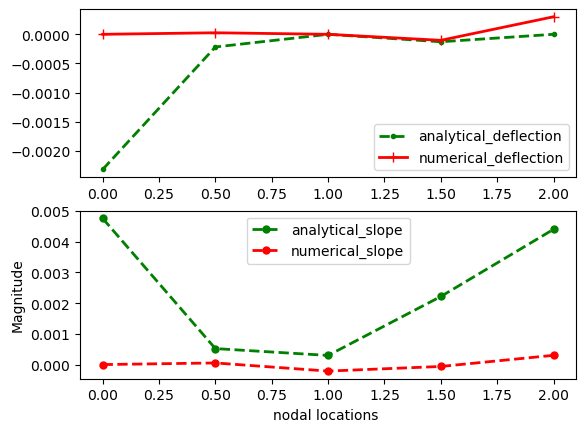

In [189]:
x = nodesPosi
y1 = UA
y2 = Deflection
z1 = slope
z2 = Slope
figure,axes = plt.subplots(2,1)
# axes[0] = fig.add_axes([0,0,1,1])
axes[0].plot(x,y1,color="green",lw=2,ls="--",marker='o',markersize=3,label='analytical_deflection')
axes[0].plot(x,y2,color="red",lw=2,ls="-",marker='+',markersize=7,label='numerical_deflection')
plt.xlabel("nodal locations ")
plt.ylabel("Magnitude")
 #   plt.title("Analytical vs Numerical",pad=10)
axes[0].legend()
# axes[1] = fig.add_axes([0,0,1,1])
axes[1].plot(x,z1,color="green",lw=2,ls="--",marker='o',markersize=5,label='analytical_slope')
axes[1].plot(x,z2,color="red",lw=2,ls="--",marker='o',markersize=5,label='numerical_slope')
plt.xlabel("nodal locations ")
plt.ylabel("Magnitude")
#   plt.title("uN-uA")
axes[1].legend()

In [5]:
a = np.zeros((2,2))

In [6]:
a

array([[0., 0.],
       [0., 0.]])